<a href="https://colab.research.google.com/github/Metallicode/Math/blob/main/Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regularization

regression model:

regression model.svg

##RSS

[Residual sum of squares](https://en.wikipedia.org/wiki/Residual_sum_of_squares)

Sum((y - predictions)**2)

rss.svg




rss_expanded.svg

In [ ]:
import numpy as np

y = np.array([1,3,5,6,7,8,9])
y_pred = np.array([1.3,2.1,4.5,6.23,8.8,8.9,10])

errors = y - y_pred
errors

array([-0.3 ,  0.9 ,  0.5 , -0.23, -1.8 , -0.9 , -1.  ])

In [ ]:
rss = sum(errors**2)

In [ ]:
rss

6.252900000000003

#Ridge Regression  (L2)

[Ridge Regression](https://www.statology.org/ridge-regression/)

RSS + shrinkage penalty

RSS + λΣβj2

RSS + (λ * sum(model.coef_**2))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('Advertising.csv')

X = df.drop('sales', axis=1)
y = df["sales"]

In [ ]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([0.04777359, 0.16556323, 0.00855185])

##Shrinkage Penalty

In [ ]:
sum(model.coef_**2)

0.029766631687732473

##Ridge Regression

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
lambda_value = 1.0 ##this is the hyper parameter we could change using cross validation
sum((np.array(y_test) - y_pred)**2) + lambda_value * sum(model.coef_**2)

216.29380100334723

##Comparing RSS to Shrinkage Penalty.

In [ ]:
print("RSS\t\t\t", sum((np.array(y_test) - y_pred)**2))
print("Shrinkage Penalty\t", sum(model.coef_**2))

RSS			 216.2640343716595
Shrinkage Penalty	 0.029766631687732473


💡**We can see that Shrinkage Penalty is insignificant in comparison to RSS - This is why we must use Feature Scaling for Ridge Regression**

##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

scalar.fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("RSS\t\t\t", sum((np.array(y_test) - y_pred)**2))
print("Shrinkage Penalty\t", sum(model.coef_**2))

RSS			 216.2640343716595
Shrinkage Penalty	 22.118519404690296


📓
When you train a Ridge regression model (or other linear models) using libraries like scikit-learn, the .coef_ attribute of the trained model usually doesn't include the intercept. The intercept is instead stored in a separate attribute named .intercept_.


If you have 3 columns (features) in your dataset, and model.coef_ gives you 3 coefficients, then each coefficient corresponds directly to one of the features. There is no intercept included in model.coef_ in this scenario.

##sklearn Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
ridge_model = Ridge(alpha=5)  ## notice λ argument is called "alpha"

In [ ]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=5)

In [ ]:
predictions = ridge_model.predict(X_test)

##Evaluate

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

In [ ]:
mae, rmse

(1.5186616279586536, 1.9086358711400049)

##Ridge Regression + Cross Validation

In [ ]:
from sklearn.linear_model import RidgeCV

In [ ]:
ridge_cv_model = RidgeCV(alphas=(0.1,1.0,10))

In [ ]:
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=(0.1, 1.0, 10))

In [ ]:
ridge_cv_model.alpha_  ##the best alpha value

0.1

##LASSO Regression (L1)

LASSO is abbreviation for ** least absolute shrinkage and selection operator **

L1 regularization, often referred to as Lasso regularization, is a method used to penalize the absolute values of the coefficients in regression models. This is in contrast to L2 regularization (Ridge regularization), which penalizes the square of the coefficients.

Basics of L1 Regularization:
Objective: L1 regularization aims to reduce the complexity of a model by adding a penalty term to the loss function. The penalty is directly proportional to the absolute values of the coefficients.

Equation: The loss function for linear regression with L1 regularization can be represented as:

L1 = Original Loss + λ∑|w|

where:

**Original Loss** - typically the mean squared error for linear regression.

**w** - represents each coefficient in the model.

**λ** - the regularization strength. A larger value of
λ results in stronger regularization.
Effect: A key property of L1 regularization is that it can lead to some coefficients being exactly zero, effectively excluding certain features from the model. This can be thought of as a kind of automatic feature selection.



**Advantages:**

Can lead to sparse models where only a subset of features are used, making the model simpler and more interpretable.
Helps in feature selection, as irrelevant features tend to have zero coefficients.


**Disadvantages:**

Can be computationally challenging if the number of features is very large.
It might not perform well when all features are relevant or when there are highly correlated features.

##Regularization Geometry

In L1 regularization (also known as Lasso), the size of the diamond is determined by the regularization strength, usually denoted by λ or α (depending on the context or library).

To put it mathematically, the objective function that you minimize in Lasso regression is:

MSE + ( λ * sum(coefficients) )


The term ( λ * sum(coefficients) ) is the L1 regularization term.

As λ increases:
- The penalty for non-zero coefficients becomes harsher.
- The diamond in our visualization becomes smaller.
- It becomes more likely that some coefficients will be set to zero.

Conversely, as λ approaches zero:
- The L1 regularization has less effect.
- The diamond becomes larger.
- Coefficients tend not to be pushed to zero, and the model approaches a regular linear regression without regularization.

In practice:
- If λ is set too high, many coefficients may become zero, oversimplifying the model and leading to underfitting.
- If λ is set too low, the model might not be regularized effectively, potentially leading to overfitting (if regularization is indeed needed).

The optimal value of λ usually requires some experimentation and is typically determined using cross-validation.

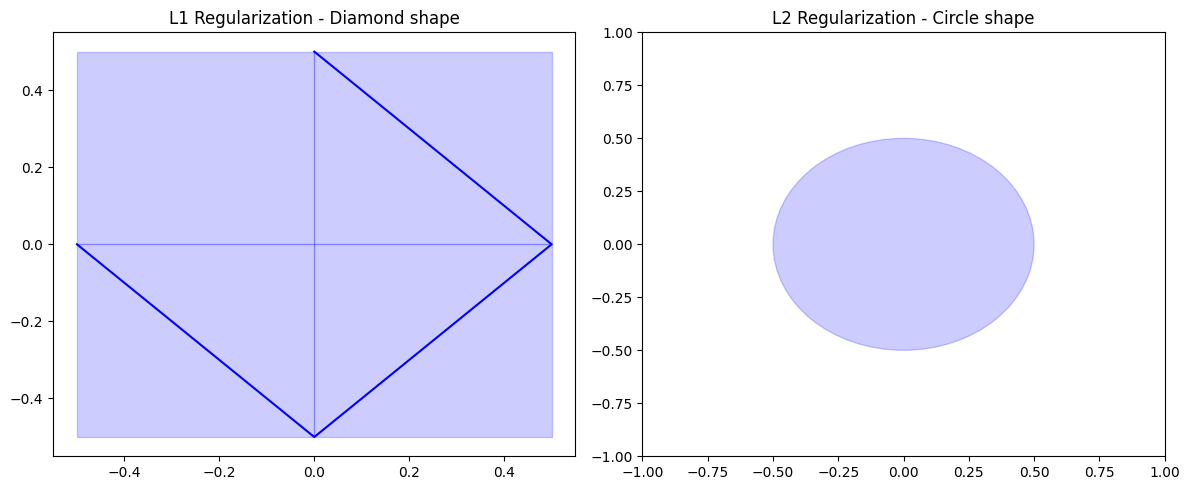

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of w1 and w2 values
w1 = np.linspace(-1, 1, 400)
w2 = np.linspace(-1, 1, 400)
W1, W2 = np.meshgrid(w1, w2)

# L1 and L2 regularization "zones"
l1_radius = 0.5  # adjust this for size of L1 diamond
l2_radius = 0.5  # adjust this for size of L2 circle

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# L1 regularization
ax[0].plot([0, l1_radius, 0, -l1_radius], [l1_radius, 0, -l1_radius, 0], 'b-')
ax[0].fill_between([0, l1_radius], 0, l1_radius, color='blue', alpha=0.2)
ax[0].fill_between([0, -l1_radius], 0, -l1_radius, color='blue', alpha=0.2)
ax[0].fill_betweenx([0, l1_radius], 0, -l1_radius, color='blue', alpha=0.2)
ax[0].fill_betweenx([0, -l1_radius], 0, l1_radius, color='blue', alpha=0.2)
ax[0].set_title("L1 Regularization - Diamond shape")

# L2 regularization
circle = plt.Circle((0, 0), l2_radius, color='blue', alpha=0.2)
ax[1].add_patch(circle)
ax[1].set_xlim(-1, 1)
ax[1].set_ylim(-1, 1)
ax[1].set_title("L2 Regularization - Circle shape")

plt.tight_layout()
plt.show()


[Matrix norm](https://www.youtube.com/watch?v=DnrQVCicPyc) Video showing L1 and L2 norm functions Geometry

##sklearn Lasso and LassoCV

📚[sklearn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html)

In [ ]:
from sklearn.linear_model import Lasso, LassoCV

0.001

In [ ]:
lasso_cv_model = LassoCV(eps=1e-3, n_alphas=100)

In the context of `LassoCV`, when you don't provide a predefined list of `alphas`, the algorithm automatically computes a set of `alpha` values for you. The way it computes these values is influenced by `eps` and `n_alphas`.

1. **n_alphas**: This defines how many alpha values you want to test. For example, if `n_alphas=100` (which is the default), it means the algorithm will try 100 different alpha values.

2. **eps**: This affects the range of alpha values that will be tested, specifically how small the smallest alpha will be. The largest alpha (let's call it `alpha_max`) is determined by the data itself — specifically, it's the smallest value for which the coefficients are all zero (due to the strong penalty). From this `alpha_max`, the algorithm then computes alpha values on a logarithmic scale down to `alpha_max * eps`.

To visualize the "regularization path": Imagine a line on a logarithmic scale where on one end you have `alpha_max` (all coefficients are zero) and on the other end you have `alpha_max * eps` (where some coefficients might be non-zero). This line is your "regularization path," and `n_alphas` defines how many points (i.e., alpha values) you sample along this path.

In simpler terms:
- `eps` defines how "far" you want to explore on this path (towards weaker regularization).
- `n_alphas` defines how "finely" you want to explore it (how many specific alpha values you'll test).


###Load data and split features and lable

In [ ]:
df = pd.read_csv('Advertising.csv')

X = df.drop('sales', axis=1)
y = df["sales"]

###Use PolynomialFeatures BEFORE feature scaling

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features_convertor = PolynomialFeatures(degree=3, include_bias=False)
polynomial_features_convertor.fit(X)
polynomial_features = polynomial_features_convertor.transform(X)
polynomial_features.shape

(200, 19)

###Split train and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(polynomial_features, y, test_size=0.3, shuffle=True)


###Use Feature Scaling on X_train and X_test

In [ ]:
#don't forget to feature scale!
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()

scalar.fit(X_train)

X_train = scalar.transform(X_train)
X_test = scalar.transform(X_test)

###Fit the LASSO Model

In [ ]:
lasso_cv_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.183e+00, tolerance: 3.592e-01
  model = cd_fast.enet_coordinate_descent(


LassoCV()

💡 Notice Sparse model

In [ ]:
lasso_cv_model.coef_


array([ 5.36012918,  0.09349992,  0.02803076, -5.97968036,  4.35766968,
       -0.        ,  0.        ,  0.31915112, -0.        ,  2.31391306,
       -0.58655878,  0.        ,  0.        , -0.28690079,  0.        ,
        0.01115444,  0.        , -0.        , -0.01635158])

###Evaluate LassoCV model

In [ ]:
y_pred = lasso_cv_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MAE", mean_absolute_error(y_pred, y_test))
print("MSE", np.sqrt(mean_squared_error(y_pred, y_test)))

MAE 0.35169381752361845
MSE 0.4403678246141651


Definition of an Ellipse: Mathematically, an ellipse can be defined as the set of points such that the sum of the distances to two fixed points (foci) is constant. An ellipse can also be represented by a quadratic equation.

Loss Function in Linear Regression: In the context of linear regression (without regularization), the Mean Squared Error (MSE) loss is a quadratic function of the parameters. When you expand the squared term, it yields terms that are quadratic in the parameters (coefficients). This is why, when visualized, the loss function appears as ellipses in the coefficient space.

Relation to the Data: The shape, orientation, and size of these ellipses depend on the structure of the data (i.e., the features in your dataset).

Orientation: If two features are correlated, then the MSE surface will be tilted in the parameter space, leading to elongated ellipses. The more correlated the features are, the more tilted and elongated the ellipse will appear.
Size: The scale of the features can affect the size of the ellipses. Features with larger scales can lead to wider ellipses, which can impact the efficiency of optimization algorithms like gradient descent.


if two columns (features) in a dataset are perfectly perpendicular (i.e., uncorrelated), then the loss function will have circular contours in that dimension space.  

Uncorrelated features can still provide valuable, independent information about the target variable.

Let's break this down further.

1. **Objective of Regularized Regression**: In regularized regression (like Ridge or Lasso), the objective is to minimize a combination of the prediction error (MSE) and the regularization term. The regularization term penalizes certain values of the coefficients (parameters).

2. **The Effect of Regularization**:
   - Without regularization, the optimization process would just focus on minimizing the prediction error (MSE). This corresponds to finding the center of the ellipses you mentioned, where the error is the smallest.
   - With regularization, the optimization is not only about minimizing the prediction error but also about staying within certain regions of the parameter space defined by the regularization term.
   
3. **Visualization of the Effect**:
   - Imagine the MSE contours as ellipses on a 2D plane. The center of the ellipse represents the minimum MSE value.
   - Now, overlay the penalty region on this plane. For L2 (Ridge) regularization, the penalty region is a circle centered at the origin, and for L1 (Lasso) regularization, it's a diamond shape.
   - Without any penalty, the best solution is at the center of the ellipse. As you increase the regularization strength (the value of the penalty parameter like α or λ , you push the solution away from the center of the ellipse towards the boundary of the penalty region.
   - At some point, the contours of the MSE will "meet" or "touch" the penalty region. The point of tangency represents the optimal coefficients that balance the trade-off between fitting the data well (minimizing MSE) and satisfying the regularization penalty.
   


##Elastic Net

[Elastic Net Wiki](https://en.wikipedia.org/wiki/Elastic_net_regularization)

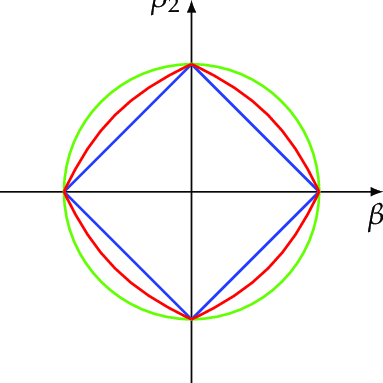

In [ ]:
from sklearn.linear_model import ElasticNetCV

In [ ]:
elastic_cv_model = ElasticNetCV(eps=1e-3, n_alphas=100, max_iter=100000,
                                l1_ratio=[ 0.1, 0.2, 0.3, 0.5, 0.8, 1])

In [ ]:
elastic_cv_model.fit(X_train, y_train)

ElasticNetCV(l1_ratio=[0.1, 0.2, 0.3, 0.5, 0.8, 1], max_iter=100000)

In [ ]:
elastic_cv_model.alpha_

0.004842814318905608

###Predict

In [ ]:
predictions = elastic_cv_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MAE", mean_absolute_error(predictions, y_test))
print("MSE", np.sqrt(mean_squared_error(predictions, y_test)))

MAE 0.34452883912081045
MSE 0.43149803875286846
